In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from networks.networks import Net
from solver import Solver
import data_visualization
import data_loader
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=4)
classes = data_loader.get_CIFAR10_classes()

Files already downloaded and verified
Files already downloaded and verified


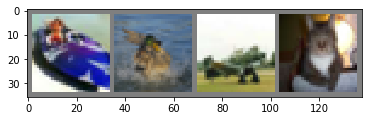

 ship  bird plane   cat


In [3]:
data_visualization.show_samples(trainloader, classes)

In [4]:
net = Net()
solver = Solver(net, trainloader, testloader, optim_config = {'lr': 0.001})
solver.train()

[1,   100] loss: 2.306
[1,   200] loss: 2.306
[1,   300] loss: 2.302
[1,   400] loss: 2.299
[1,   500] loss: 2.296
[1,   600] loss: 2.286
[1,   700] loss: 2.279
[1,   800] loss: 2.261
[1,   900] loss: 2.233
[1,  1000] loss: 2.232
[1,  1100] loss: 2.221
[1,  1200] loss: 2.179
[1,  1300] loss: 2.180
[1,  1400] loss: 2.123
[1,  1500] loss: 2.160
[1,  1600] loss: 2.126
[1,  1700] loss: 2.066
[1,  1800] loss: 2.050
[1,  1900] loss: 2.025
[1,  2000] loss: 2.025
[1,  2100] loss: 2.059
[1,  2200] loss: 2.051
[1,  2300] loss: 2.019
[1,  2400] loss: 1.987
[1,  2500] loss: 1.899
[1,  2600] loss: 1.911
[1,  2700] loss: 1.929
[1,  2800] loss: 1.927
[1,  2900] loss: 1.808
[1,  3000] loss: 1.806
[1,  3100] loss: 1.880
[1,  3200] loss: 1.841
[1,  3300] loss: 1.832
[1,  3400] loss: 1.754
[1,  3500] loss: 1.753
[1,  3600] loss: 1.786
[1,  3700] loss: 1.825
[1,  3800] loss: 1.784
[1,  3900] loss: 1.748
[1,  4000] loss: 1.754
[1,  4100] loss: 1.708
[1,  4200] loss: 1.774
[1,  4300] loss: 1.638
[1,  4400] 

[3, 10800] loss: 1.194
[3, 10900] loss: 1.186
[3, 11000] loss: 1.217
[3, 11100] loss: 1.155
[3, 11200] loss: 1.206
[3, 11300] loss: 1.198
[3, 11400] loss: 1.172
[3, 11500] loss: 1.286
[3, 11600] loss: 1.116
[3, 11700] loss: 1.189
[3, 11800] loss: 1.103
[3, 11900] loss: 1.289
[3, 12000] loss: 1.091
[3, 12100] loss: 1.240
[3, 12200] loss: 1.108
[3, 12300] loss: 1.227
[3, 12400] loss: 1.053
[3, 12500] loss: 1.202
[4,   100] loss: 1.155
[4,   200] loss: 1.023
[4,   300] loss: 1.022
[4,   400] loss: 1.176
[4,   500] loss: 1.222
[4,   600] loss: 1.111
[4,   700] loss: 1.087
[4,   800] loss: 1.096
[4,   900] loss: 1.116
[4,  1000] loss: 1.006
[4,  1100] loss: 1.055
[4,  1200] loss: 1.145
[4,  1300] loss: 1.064
[4,  1400] loss: 1.083
[4,  1500] loss: 1.005
[4,  1600] loss: 1.074
[4,  1700] loss: 1.135
[4,  1800] loss: 1.124
[4,  1900] loss: 1.029
[4,  2000] loss: 1.266
[4,  2100] loss: 1.122
[4,  2200] loss: 1.103
[4,  2300] loss: 1.097
[4,  2400] loss: 1.106
[4,  2500] loss: 1.212
[4,  2600] 

[6,  9000] loss: 1.036
[6,  9100] loss: 0.955
[6,  9200] loss: 0.985
[6,  9300] loss: 0.995
[6,  9400] loss: 0.926
[6,  9500] loss: 1.005
[6,  9600] loss: 0.902
[6,  9700] loss: 0.904
[6,  9800] loss: 1.002
[6,  9900] loss: 0.929
[6, 10000] loss: 1.105
[6, 10100] loss: 0.927
[6, 10200] loss: 1.000
[6, 10300] loss: 1.047
[6, 10400] loss: 1.075
[6, 10500] loss: 0.972
[6, 10600] loss: 1.040
[6, 10700] loss: 0.920
[6, 10800] loss: 1.035
[6, 10900] loss: 0.875
[6, 11000] loss: 0.996
[6, 11100] loss: 1.130
[6, 11200] loss: 0.997
[6, 11300] loss: 1.017
[6, 11400] loss: 0.883
[6, 11500] loss: 1.037
[6, 11600] loss: 1.120
[6, 11700] loss: 1.007
[6, 11800] loss: 0.962
[6, 11900] loss: 0.948
[6, 12000] loss: 0.975
[6, 12100] loss: 1.029
[6, 12200] loss: 1.010
[6, 12300] loss: 0.923
[6, 12400] loss: 0.998
[6, 12500] loss: 1.011
[7,   100] loss: 0.863
[7,   200] loss: 0.937
[7,   300] loss: 0.898
[7,   400] loss: 0.964
[7,   500] loss: 0.906
[7,   600] loss: 0.981
[7,   700] loss: 0.877
[7,   800] 

[9,  7200] loss: 0.883
[9,  7300] loss: 0.859
[9,  7400] loss: 0.933
[9,  7500] loss: 0.863
[9,  7600] loss: 0.908
[9,  7700] loss: 0.896
[9,  7800] loss: 0.758
[9,  7900] loss: 0.839
[9,  8000] loss: 0.890
[9,  8100] loss: 0.881
[9,  8200] loss: 0.793
[9,  8300] loss: 0.846
[9,  8400] loss: 0.878
[9,  8500] loss: 0.788
[9,  8600] loss: 0.797
[9,  8700] loss: 1.034
[9,  8800] loss: 0.878
[9,  8900] loss: 0.969
[9,  9000] loss: 0.838
[9,  9100] loss: 0.852
[9,  9200] loss: 0.848
[9,  9300] loss: 0.804
[9,  9400] loss: 0.898
[9,  9500] loss: 0.943
[9,  9600] loss: 0.935
[9,  9700] loss: 0.820
[9,  9800] loss: 0.888
[9,  9900] loss: 1.028
[9, 10000] loss: 0.873
[9, 10100] loss: 0.928
[9, 10200] loss: 0.893
[9, 10300] loss: 0.816
[9, 10400] loss: 0.958
[9, 10500] loss: 0.852
[9, 10600] loss: 0.827
[9, 10700] loss: 0.988
[9, 10800] loss: 0.764
[9, 10900] loss: 0.876
[9, 11000] loss: 0.849
[9, 11100] loss: 0.957
[9, 11200] loss: 0.930
[9, 11300] loss: 0.931
[9, 11400] loss: 0.988
[9, 11500] 

In [5]:
PATH = './cifar_net.pth'
solver.save_model()

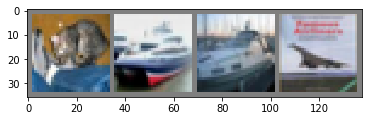

  cat  ship  ship plane


In [6]:
data_visualization.show_samples(testloader, classes)

In [7]:
net = Net()
solver.load_model()

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 10 %


In [9]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship : 100 %
Accuracy of truck :  0 %
